<a href="https://colab.research.google.com/github/Bonjiang/datasci_6_regression/blob/main/507_Week6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_goldfeldquandt

### Simple Linear Regression

In [4]:
df = pd.read_csv('musicsurveryreg_results.csv')
df

,Hours per day,BPM
0,3.0,156.0
1,1.5,119.0
2,4.0,132.0
3,2.5,84.0
4,4.0,107.0
...,...,...
731,2.0,120.0
732,1.0,160.0
733,6.0,120.0
734,5.0,170.0


##### I chose this dataset to perform a simple linear regression analysis to estimate the strength of the relationship between the quantitative variables of 'Hours per day' and 'BPM' (beats per minute). 'Hours per day' measures the hours spent listening to music per day. Since people listen to music on a daily basis, I'm curious to see how/if it has a strong relationship with BPM

In [22]:
df.columns # To check the column names

Index(['Hours per day', 'BPM'], dtype='object')

##### Dropping rows with any missing values, noticed some missing values with this dataset

In [10]:
df.dropna(inplace=True)
df

,Hours per day,BPM
0,3.0,156.0
1,1.5,119.0
2,4.0,132.0
3,2.5,84.0
4,4.0,107.0
...,...,...
731,2.0,120.0
732,1.0,160.0
733,6.0,120.0
734,5.0,170.0


##### Fit the regression model

In [26]:
X = sm.add_constant(df['Hours per day'])
model = sm.OLS(df['BPM'], X)
results = model.fit()
residuals = results.resid
fitted = results.fittedvalues
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BPM   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.137
Date:                Sun, 12 Nov 2023   Prob (F-statistic):              0.287
Time:                        21:32:18   Log-Likelihood:                -11900.
No. Observations:                 629   AIC:                         2.380e+04
Df Residuals:                     627   BIC:                         2.381e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.499e+05   2.49e+06     -0.181

##### These regression results depict a lot of information. The R-sqaured value measures how well the independent variable explain the variation in the dependent variable. In my case, my R-squared value is 0.002-this is very close to zero, indicating that only a extremely small proportion of dependent variable (BPM) variability is explained by the independent variable (Hours per day). Perhaps a linear model is not fit for this dataset. Adjusted R-squared value is just the R-squared value, but modified for the amount of predictors (independent variable) in this model. The p-value for 'Hours per day' is 0.287-greater than the 0.05 significance level, which means that 'Hours per day is not statisically significant in predicting 'BPM'

##### Assessing Linearity of the relationship

In [12]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=2663890909694.2476, p-value=0.0


##### This p-value implies that the null hypothesis is rejected and the the linear model is not fit for this dataset.

##### Plot observed vs fitted values

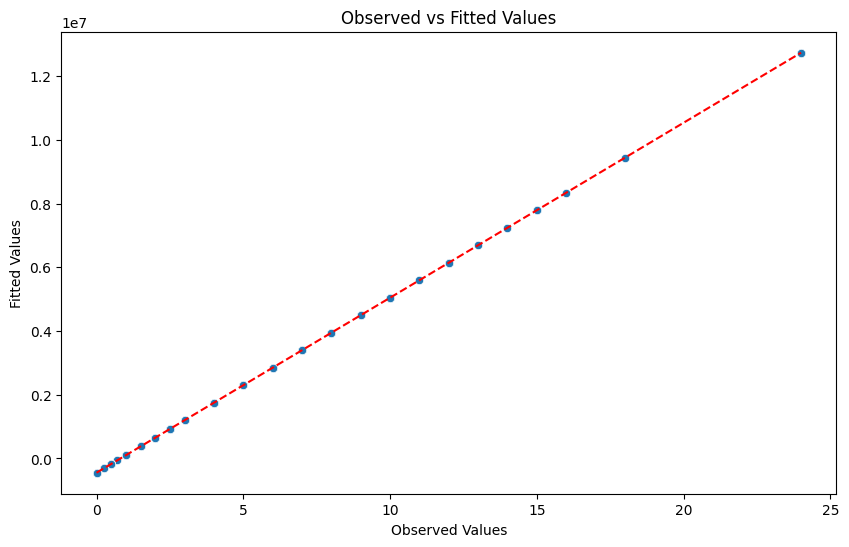

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Hours per day'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['Hours per day']), max(df['Hours per day'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()



##### This is interesting because it shows little deviation and perhaps it is a good fit because the points fall close to the dashed line.

##### Assessing the normality of the residuals

In [25]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=nan, p-value=1.0


##### The test statistic (W) produced nan, which could suggest the sample size is very small to produce a statistic that is reasonable or meaningful or there are other issues with this set. The p-value is 1.0, which suggests that there is no significant evidence to reject it.

##### Plot Q-Q plot of residuals

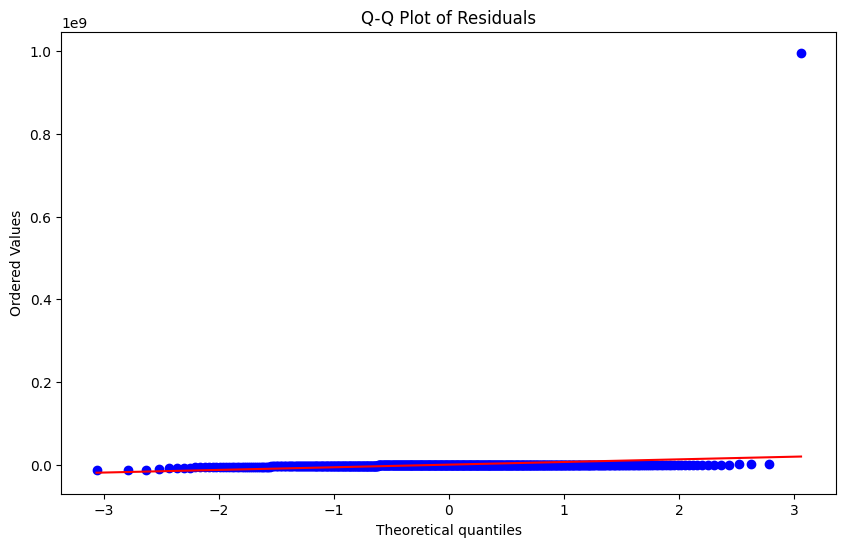

In [28]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

##### This plot assesses whether the distribution of residuals from the regression model follow a normal distribution. In this case, the residuals do not deviate significantly from the straight line. However, the tails deviate, suggesting outliers.

##### Assessing the homogeneity of variance of the residuals

In [29]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=2900694734142.4814, p-value=0.0


##### The low p-value suggests that there is heteroscedasticity-the variability of the residuals is not constant  across different levels of the independent variable (Hours per day)

### Multiple Linear Regression

In [33]:
df2 = pd.read_csv('Maternal Health Risk Data Set.csv')
df2

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


##### I chose this dataset because it has multiple continous variables that I was interested in and it also is in the subject of maternal health. I selected 'BS'-Blood glucose levels as my dependent variable because I wanted to see how the other independent variables cause a higher or lower blood glucose level.

Fit the regression model

In [40]:
X = df[['SystolicBP', 'DiastolicBP', 'BodyTemp', 'HeartRate']] # Independent Variables
X = sm.add_constant(X)  # Adds a constant term to the predictor
y = df['BS'] # Dependent Variable
model = sm.OLS(y, X)
results = model.fit()
residuals = results.resid
fitted = results.fittedvalues
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                     BS   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     74.18
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           3.79e-55
Time:                        22:46:26   Log-Likelihood:                -2516.2
No. Observations:                1014   AIC:                             5042.
Df Residuals:                    1009   BIC:                             5067.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -8.3827      7.054     -1.188      

##### The R-squared value is 0.227, indicating that there is moderate amount of the variability in the BS dependent variable. The model is overall stastically significant. The Systolic and Diastolic Blood Pressure, and Heart Rate seem to be significant predictors of the dependent variable while the Body Temperature does not seem to be statistically significant due to high p-value.

##### Checking multicollinearity using VIF

In [45]:
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Data:")
print(vif_data)


VIF Data:
      Variable          VIF
0        const  5996.113497
1   SystolicBP     2.683632
2  DiastolicBP     2.639300
3     BodyTemp     1.102437
4    HeartRate     1.011531


##### The high const-constant term-suggests that there may be strong correlations amongst the independent variables, Systolic and Diastolic BP suggests moderate while Body Temperature and Heart Rate suggests low correlations.

##### Assessing linearity of the relationship

In [46]:
stat, p_value = linear_rainbow(results)
print(f"Rainbow Test: stat={stat}, p-value={p_value}")

Rainbow Test: stat=1.0387410466438154, p-value=0.334880331069811


##### The p-value is greater than 0.05, suggesting that there is not enough sufficient evidence to reject the null hypothesis andthe stat value suggest that the relationship between independent and dependent variables may not be linear.

##### Plot observed vs fitted values

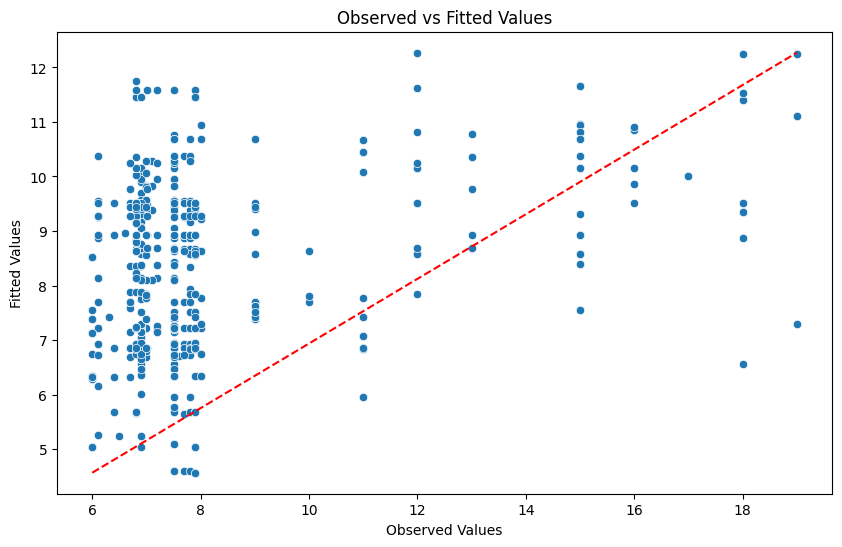

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['BS'], y=fitted)
plt.xlabel('Observed Values')
plt.ylabel('Fitted Values')
plt.title('Observed vs Fitted Values')
plt.plot([min(df['BS']), max(df['BS'])], [min(fitted), max(fitted)], color='red', linestyle='--')
plt.show()


##### Assessing normality of the residuals

In [47]:
W, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: W={W}, p-value={p_value}")

Shapiro-Wilk Test: W=0.890583336353302, p-value=3.3831917701556377e-26


##### Plot Q-Q plot of residuals

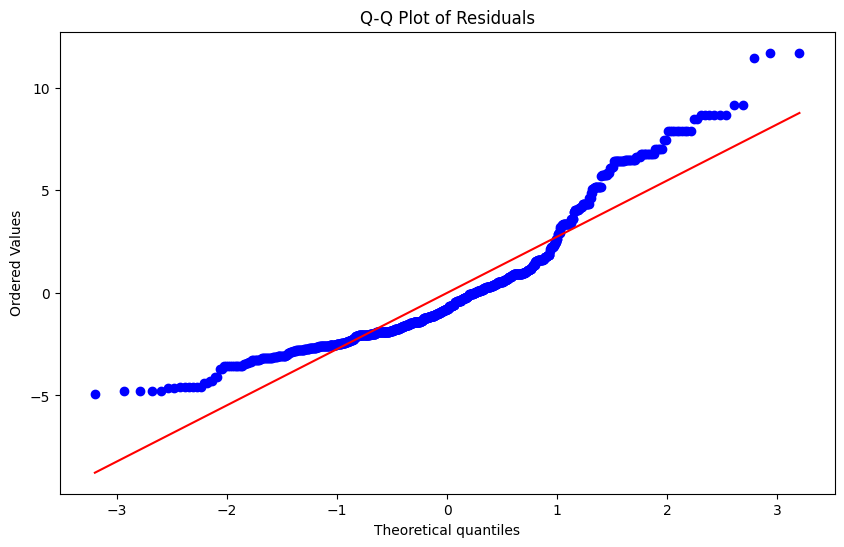

In [49]:
plt.figure(figsize=(10, 6))
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

##### This shows that the relationship between these variables have a lot of deviation and   perhaps it is not good fit because the points do not fall close to the dashed line.

##### Assessing the homogeneity of variance of the residuals

In [50]:
gq_test = het_goldfeldquandt(residuals, results.model.exog)
print(f"Goldfeld-Quandt Test: F-statistic={gq_test[0]}, p-value={gq_test[1]}")

Goldfeld-Quandt Test: F-statistic=0.8273708494913588, p-value=0.9830093008367712


##### The high p-value suggests that there is no evidence of heteroscedasticity in the residuals and assuming homoscedasticity (constant variance) is reasonable